In [11]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
#import the requests library
import requests

#import the api key
from config import weather_api_key

In [12]:
from citipy import citipy

In [13]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [16]:
#starting url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [18]:
# create an empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counter
record_count = 1
set_count = 1

#loop through all the cities in the list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #create endpoin url with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the url, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | kamenka
Processing Record 3 of Set 1 | ostrovnoy
Processing Record 4 of Set 1 | banjar
Processing Record 5 of Set 1 | mazarron
Processing Record 6 of Set 1 | sistranda
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | pisco
Processing Record 9 of Set 1 | lethem
Processing Record 10 of Set 1 | malartic
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | manokwari
Processing Record 16 of Set 1 | mbarara
Processing Record 17 of Set 1 | pacific grove
Processing Record 18 of Set 1 | grand gaube
Processing Record 19 of Set 1 | elizabeth city
Processing Record 20 of Set 1 | poum
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | nikolskoye
Processing Record 23 of Set 1 | rikitea
Processin

In [23]:
#convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
#change the order of the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-04-04 18:30:21,71.2906,-156.7887,-9.40,77,1,13.80
1,Kamenka,RU,2021-04-04 18:30:22,51.3223,42.7678,39.00,84,98,5.57
2,Ostrovnoy,RU,2021-04-04 18:30:22,68.0531,39.5131,31.69,91,100,19.26
3,Banjar,ID,2021-04-04 18:30:22,-8.1900,114.9675,82.40,78,40,5.75
4,Mazarron,ES,2021-04-04 18:30:23,37.5992,-1.3149,63.00,72,75,12.66
5,Sistranda,NO,2021-04-04 18:30:23,63.7256,8.8340,35.60,69,75,25.32
6,Victoria,HK,2021-04-04 18:26:27,22.2855,114.1577,73.00,88,97,1.99
7,Pisco,PE,2021-04-04 18:30:24,-13.7000,-76.2167,78.80,61,0,10.36
8,Lethem,GY,2021-04-04 18:30:24,3.3803,-59.7968,86.86,60,98,12.12
9,Malartic,CA,2021-04-04 18:30:08,48.1335,-78.1328,44.60,61,40,8.05


In [27]:
#create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
#extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

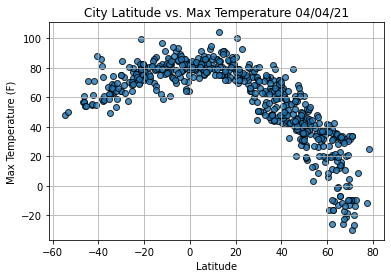

In [31]:
#import time module
import time

#build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#inorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

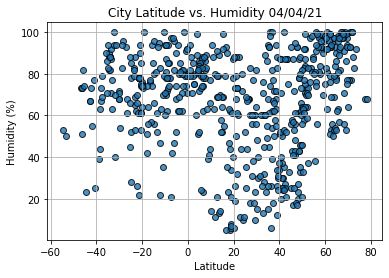

In [32]:
#build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#inorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

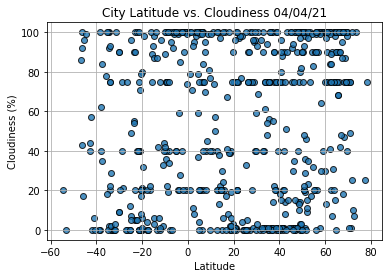

In [33]:
#build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#inorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

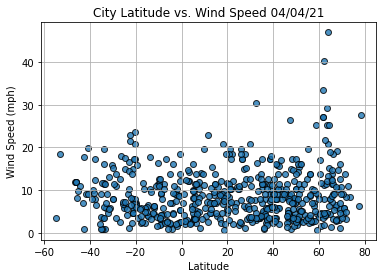

In [34]:
#build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#inorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig4.png")

#show plot
plt.show()

In [36]:
#import lineregress
from scipy.stats import linregress

#create a function to create perorm linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line "y valuesj" from the slope and intercept
    regress_values = x_values * slope + intercept
    #get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-04-04 18:30:21,71.2906,-156.7887,-9.40,77,1,13.80
1,Kamenka,RU,2021-04-04 18:30:22,51.3223,42.7678,39.00,84,98,5.57
2,Ostrovnoy,RU,2021-04-04 18:30:22,68.0531,39.5131,31.69,91,100,19.26
4,Mazarron,ES,2021-04-04 18:30:23,37.5992,-1.3149,63.00,72,75,12.66
5,Sistranda,NO,2021-04-04 18:30:23,63.7256,8.8340,35.60,69,75,25.32


In [42]:
#create nothern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

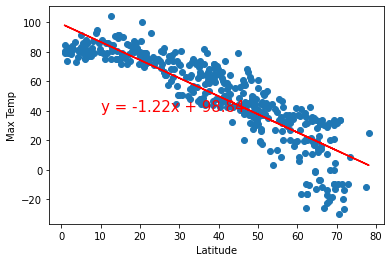

In [46]:
#linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Nothern Hemisphere \
                       for Maximum temerature", "Max Temp", (10,40))

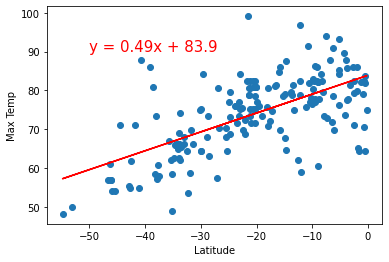

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

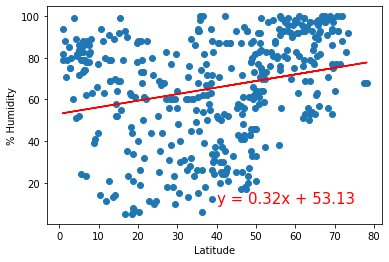

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

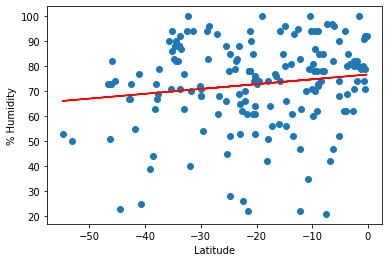

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

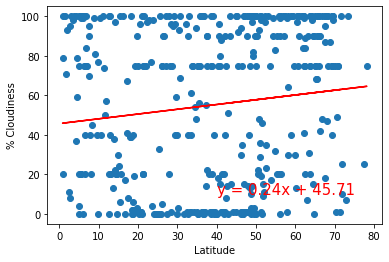

In [51]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

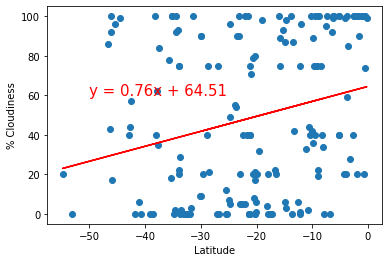

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

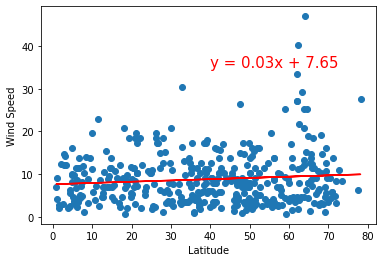

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

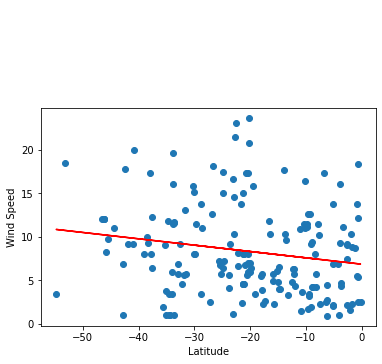

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))